# Census Insights

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])
census_df = pd.read_csv('../data/Census.csv')

crimes_df['NEIGHBORHOOD'] = crimes_df['NEIGHBORHOOD_ID'].apply(lambda x: str(x).replace('-', ' ').title())

merged_df = pd.merge(left=crimes_df, right=census_df, left_on='NEIGHBORHOOD', right_on='NAME', how='inner')

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_95153/2420246411.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_df = pd.read_csv('../data/Crimes.csv', parse_dates=['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE'])


Which neighborhoods have the highest crime rates per capita?

In [48]:
crimes_per_neighborhood_df = merged_df[merged_df['FIRST_OCCURRENCE_DATE'].dt.year == 2025].groupby('NEIGHBORHOOD')['SUM_POPULATION_2010'].value_counts().reset_index(name='TOTAL_CRIMES')
crimes_per_neighborhood_df['CRIME_RATE'] = (crimes_per_neighborhood_df['TOTAL_CRIMES'] / crimes_per_neighborhood_df['SUM_POPULATION_2010'] * 100).round(2)
crimes_per_neighborhood_df = crimes_per_neighborhood_df.sort_values(by='CRIME_RATE', ascending=False)

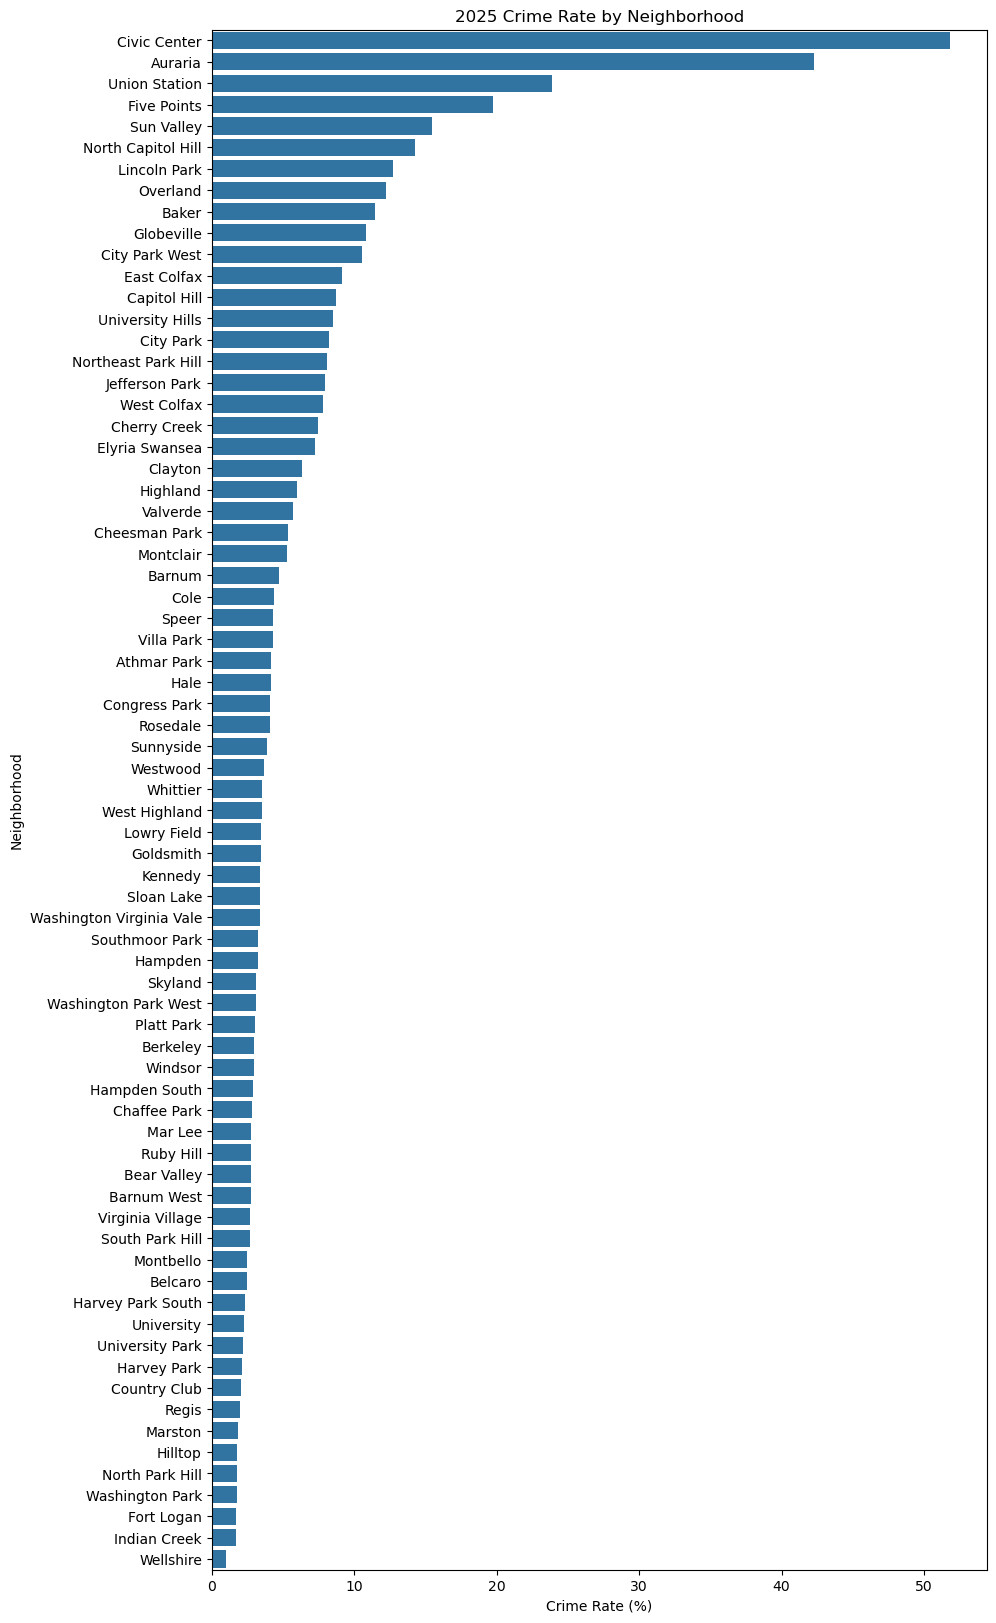

In [49]:
plt.figure(figsize=(10, 20))

sns.barplot(data=crimes_per_neighborhood_df, x='CRIME_RATE', y='NEIGHBORHOOD')

plt.title('2025 Crime Rate by Neighborhood')
plt.xlabel('Crime Rate (%)')
plt.ylabel('Neighborhood')

plt.show()

Is there a correlation between home ownership and larceny rates?

In [ ]:
larceny_df = merged_df[merged_df['OFFENSE_CATEGORY_ID'] == 'larceny'].groupby('NEIGHBORHOOD')[['SUM_Owned_w_Mortg_Loan', 'SUM_Owned_Free_Clear', 'SUM_POPULATION_2010']].value_counts().reset_index(name="TOTAL_LARCENIES")
larceny_df['TOTAL_OWNED'] = larceny_df['SUM_Owned_w_Mortg_Loan'] + larceny_df['SUM_Owned_Free_Clear']
larceny_df['LARCENY_RATE'] = (larceny_df['TOTAL_LARCENIES'] / larceny_df['TOTAL_OWNED'] * 100).round(2)
larceny_df['OWNERSHIP_RATE'] = (larceny_df['TOTAL_OWNED'] / larceny_df['SUM_POPULATION_2010'] * 100).round(2)

,NEIGHBORHOOD,SUM_Owned_w_Mortg_Loan,SUM_Owned_Free_Clear,SUM_POPULATION_2010,TOTAL_LARCENIES,TOTAL_OWNED,LARCENY_RATE,OWNERSHIP_RATE
0,Athmar Park,1336,404,8898,351,1740,20.17,19.55
1,Auraria,34,5,705,396,39,1015.38,5.53
2,Baker,915,170,4879,1348,1085,124.24,22.24
3,Barnum,821,181,6111,213,1002,21.26,16.40
4,Barnum West,895,262,5376,115,1157,9.94,21.52
...,...,...,...,...,...,...,...,...
67,West Colfax,775,182,9740,1212,957,126.65,9.83
68,West Highland,2228,437,8540,684,2665,25.67,31.21
69,Westwood,1437,464,15486,356,1901,18.73,12.28
70,Whittier,996,149,4831,215,1145,18.78,23.70


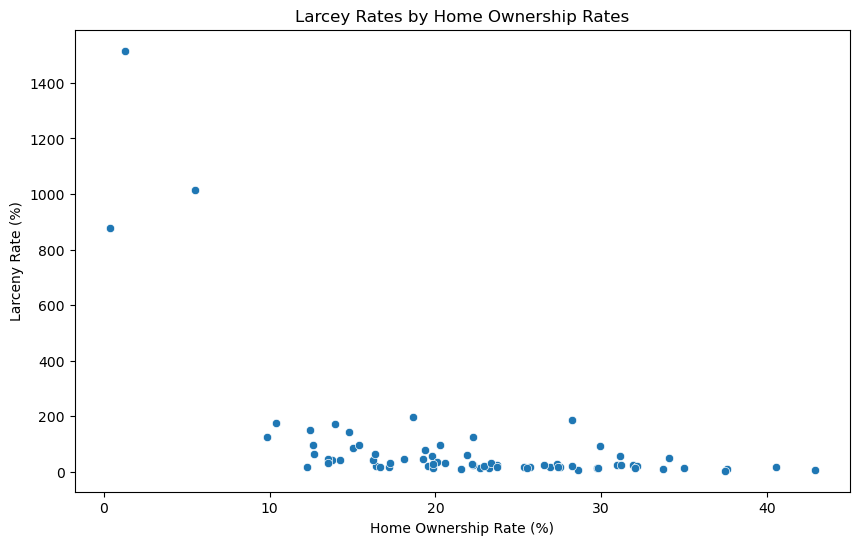

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=larceny_df, x='OWNERSHIP_RATE', y='LARCENY_RATE')

plt.title('Larcey Rates by Home Ownership Rates')
plt.xlabel('Home Ownership Rate (%)')
plt.ylabel('Larceny Rate (%)')
plt.show()

Do neighborhoods with different age profiles have different crime rates?